In [40]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [41]:
#Load the data
df = pd.read_csv('/content/synthetic_asthma_dataset.csv')
df

,Patient_ID,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Asthma_Control_Level
0,ASTH100000,52,Female,27.6,Former,1,NaN,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0,NaN
1,ASTH100001,15,Male,24.6,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0,NaN
2,ASTH100002,72,Female,17.6,Never,0,NaN,Moderate,Moderate,Indoor,NaN,0.38,0,303.3,15.3,0,NaN
3,ASTH100003,61,Male,16.8,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1,Poorly Controlled
4,ASTH100004,21,Male,30.2,Never,0,NaN,Moderate,Active,Indoor,NaN,0.82,3,535.0,27.7,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ASTH109995,70,Male,25.0,Never,0,NaN,Low,Sedentary,Indoor,NaN,0.67,0,580.6,18.7,0,NaN
9996,ASTH109996,78,Female,24.8,Never,0,Pollen,Low,Moderate,Indoor,Diabetes,0.72,1,417.6,40.8,0,NaN
9997,ASTH109997,58,Male,30.1,Former,1,Pollen,Low,Moderate,Indoor,NaN,0.28,0,459.1,20.3,1,Not Controlled
9998,ASTH109998,88,Female,31.2,Former,0,Pollen,Moderate,Moderate,Indoor,NaN,0.44,0,415.9,25.0,0,NaN


In [42]:
# checked columns
print(df.columns.tolist())


['Patient_ID', 'Age', 'Gender', 'BMI', 'Smoking_Status', 'Family_History', 'Allergies', 'Air_Pollution_Level', 'Physical_Activity_Level', 'Occupation_Type', 'Comorbidities', 'Medication_Adherence', 'Number_of_ER_Visits', 'Peak_Expiratory_Flow', 'FeNO_Level', 'Has_Asthma', 'Asthma_Control_Level']


In [43]:
#Summary
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               10000 non-null  object 
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   BMI                      10000 non-null  float64
 4   Smoking_Status           10000 non-null  object 
 5   Family_History           10000 non-null  int64  
 6   Allergies                7064 non-null   object 
 7   Air_Pollution_Level      10000 non-null  object 
 8   Physical_Activity_Level  10000 non-null  object 
 9   Occupation_Type          10000 non-null  object 
 10  Comorbidities            5033 non-null   object 
 11  Medication_Adherence     10000 non-null  float64
 12  Number_of_ER_Visits      10000 non-null  int64  
 13  Peak_Expiratory_Flow     10000 non-null  float64
 14  FeNO_Level             

,Age,BMI,Family_History,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,44.930700,25.053320,0.303400,0.497998,1.015900,400.884090,25.101420,0.243300
std,25.653559,4.874466,0.459749,0.224809,1.020564,97.531113,9.840184,0.429096
min,1.000000,15.000000,0.000000,0.000000,0.000000,150.000000,5.000000,0.000000
25%,23.000000,21.600000,0.000000,0.320000,0.000000,334.800000,18.200000,0.000000
50%,45.000000,25.000000,0.000000,0.500000,1.000000,402.500000,25.000000,0.000000
75%,67.000000,28.400000,1.000000,0.670000,2.000000,468.700000,31.700000,0.000000
max,89.000000,45.000000,1.000000,0.990000,6.000000,600.000000,63.900000,1.000000


In [44]:
# Show new shape and first few rows after dropping
df.shape

(10000, 17)

In [45]:
#Checked missing values
df.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
BMI,0
Smoking_Status,0
Family_History,0
Allergies,2936
Air_Pollution_Level,0
Physical_Activity_Level,0
Occupation_Type,0


In [46]:
#Checked duplicated videos
df.duplicated().sum()

np.int64(0)

In [47]:
# Check how many missing (null) values are in each column
missing_values = df.isnull().sum()

# Filter only those columns jahan missing values hain
missing_values = missing_values[missing_values > 0]

# Create bar plot
fig = px.bar(
    missing_values,
    x=missing_values.index,
    y=missing_values.values,
    labels={'x': 'Columns', 'y': 'Number of Missing Values'},
    title='Missing Values in Each Column'
)

fig.show()


In [48]:
# 'Patient_ID' is just an identifier (like a name tag), it does not help in prediction.
# 'Asthma_Control_Level' has too many missing values (~75%) so we will drop it for now.
df = df.drop(['Patient_ID', 'Asthma_Control_Level'], axis=1)

In [49]:
df['Allergies'].value_counts()

,count
Allergies,
Dust,2479
Pollen,1999
Pets,1585
Multiple,1001


In [50]:
# Fill missing values in 'Allergies' with 'None'
df['Allergies'] = df['Allergies'].fillna('None')

In [51]:
df['Comorbidities'].value_counts()

,count
Comorbidities,
Diabetes,2029
Hypertension,2018
Both,986


In [52]:
# Fill missing values in 'Comorbidities' with 'Unknown'
df['Comorbidities'] = df['Comorbidities'].fillna('Unknown')

In [53]:
# Confirm changes
print(df[['Allergies', 'Comorbidities']].isnull().sum())

Allergies        0
Comorbidities    0
dtype: int64


In [54]:
import plotly.subplots as sp
import plotly.graph_objects as go

# ✅ Clean categorical features list
categorical_cols = [
    'Gender', 'Smoking_Status', 'Allergies',
    'Air_Pollution_Level', 'Physical_Activity_Level',
    'Occupation_Type', 'Comorbidities', 'Has_Asthma'
]

# 🎨 Distinct professional colors
color_palette = [
    '#636EFA', '#EF553B', '#00CC96', '#AB63FA',
    '#FFA15A', '#19D3F3', '#FF6692', '#B6E880'
]

# 📐 Subplot layout
rows = (len(categorical_cols) + 1) // 2
fig = sp.make_subplots(
    rows=rows, cols=2,
    subplot_titles=categorical_cols,
    vertical_spacing=0.18,
    horizontal_spacing=0.12
)

# 📊 Add bar charts
for i, col in enumerate(categorical_cols):
    row = (i // 2) + 1
    col_pos = (i % 2) + 1
    counts = df[col].value_counts().reset_index()
    counts.columns = [col, 'Count']

    bar = go.Bar(
        x=counts[col],
        y=counts['Count'],
        name=col,
        marker_color=color_palette[i % len(color_palette)],
        text=counts['Count'],
        textposition='auto',
        showlegend=False
    )

    fig.add_trace(bar, row=row, col=col_pos)

# 🎨 Styling and layout updates
fig.update_layout(
    height=500 * rows,  # increased height
    width=1200,         # wider figure
    title_text="📊 Count Plots of Categorical")


In [55]:
target = 'Has_Asthma'

categorical_cols = [
    'Gender', 'Smoking_Status', 'Allergies',
    'Air_Pollution_Level', 'Physical_Activity_Level',
    'Occupation_Type', 'Comorbidities'
]

numerical_cols = [
    'Age', 'BMI', 'Medication_Adherence', 'Number_of_ER_Visits',
    'Peak_Expiratory_Flow', 'FeNO_Level'
]


In [56]:
for col in categorical_cols:
    fig = px.histogram(
        df,
        x=col,
        color=target,
        barmode='group',
        title=f"{col} vs Has Asthma",
        color_discrete_sequence=['#636EFA', '#EF553B']  # Blue & Red
    )

    fig.update_layout(
        bargap=0.2,
        template='plotly_dark',
        title_font=dict(size=24),
        xaxis_title=col,
        yaxis_title="Count",
        legend_title="Has Asthma",
        legend=dict(
            font=dict(size=14),
            bgcolor='rgba(0,0,0,0)'
        )
    )
    fig.show()


In [57]:
# Binary Encoding
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1, 'Other': 2})

# Convert Gender to integer type after dropping NaN
df['Gender'] = df['Gender'].astype(int)

In [58]:
#Checked gender datatypes
df['Gender'].dtype

dtype('int64')

In [59]:
#Label encoding
df['Smoking_Status'] = df['Smoking_Status'].map({'Never': 0, 'Former': 1, 'Current': 2})


In [60]:
from scipy.stats import gaussian_kde


for col in numerical_cols:
    x = df[col].dropna()

    # Histogram
    hist = go.Histogram(
        x=x,
        nbinsx=30,
        name='Histogram',
        marker_color='indigo',
        opacity=0.6
    )

    # KDE Line
    kde = gaussian_kde(x)
    x_vals = np.linspace(x.min(), x.max(), 500)
    kde_line = go.Scatter(
        x=x_vals,
        y=kde(x_vals) * len(x) * (x.max() - x.min()) / 30,  # Scaling to match histogram
        mode='lines',
        name='KDE',
        line=dict(color='cyan', width=2)
    )

    fig = go.Figure(data=[hist, kde_line])

    fig.update_layout(
        title=f'Distribution of {col}',
        title_font=dict(size=20),
        xaxis_title=col,
        yaxis_title="Count",
        bargap=0.1,
        template='plotly_dark'
    )

    fig.show()


In [61]:
for col in numerical_cols:
    fig = px.box(
        df,
        x=target,
        y=col,
        color=target,
        title=f"{col} Distribution by Asthma Status",
        color_discrete_sequence=['#636EFA', '#EF553B'],
        points='all'  # Show all data points
    )

    fig.update_layout(
        template='plotly_dark',
        title_font=dict(size=24),
        xaxis_title="Has Asthma",
        yaxis_title=col,
        boxmode='group',
        legend=dict(
            font=dict(size=14),
            bgcolor='rgba(0,0,0,0)'
        )
    )
    fig.show()


In [62]:
#One hot encoding
df_encoded = pd.get_dummies(df, columns=[
    'Allergies', 'Air_Pollution_Level',
    'Physical_Activity_Level', 'Occupation_Type', 'Comorbidities'
], drop_first=True)


In [63]:
df_encoded = df_encoded.astype({
    col: 'int' for col in df_encoded.columns if df_encoded[col].dtype == 'bool'
})


In [64]:
print(df_encoded.dtypes)


Age                                    int64
Gender                                 int64
BMI                                  float64
Smoking_Status                         int64
Family_History                         int64
Medication_Adherence                 float64
Number_of_ER_Visits                    int64
Peak_Expiratory_Flow                 float64
FeNO_Level                           float64
Has_Asthma                             int64
Allergies_Multiple                     int64
Allergies_None                         int64
Allergies_Pets                         int64
Allergies_Pollen                       int64
Air_Pollution_Level_Low                int64
Air_Pollution_Level_Moderate           int64
Physical_Activity_Level_Moderate       int64
Physical_Activity_Level_Sedentary      int64
Occupation_Type_Outdoor                int64
Comorbidities_Diabetes                 int64
Comorbidities_Hypertension             int64
Comorbidities_Unknown                  int64
dtype: obj

In [65]:
df_encoded

,Age,Gender,BMI,Smoking_Status,Family_History,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,...,Allergies_Pets,Allergies_Pollen,Air_Pollution_Level_Low,Air_Pollution_Level_Moderate,Physical_Activity_Level_Moderate,Physical_Activity_Level_Sedentary,Occupation_Type_Outdoor,Comorbidities_Diabetes,Comorbidities_Hypertension,Comorbidities_Unknown
0,52,1,27.6,1,1,0.38,0,421.0,46.0,0,...,0,0,0,1,0,1,1,1,0,0
1,15,0,24.6,1,0,0.60,2,297.6,22.9,0,...,0,0,1,0,1,0,0,0,0,0
2,72,1,17.6,0,0,0.38,0,303.3,15.3,0,...,0,0,0,1,1,0,0,0,0,1
3,61,0,16.8,0,0,0.60,1,438.0,40.1,1,...,0,0,0,0,0,1,1,0,0,0
4,21,0,30.2,0,0,0.82,3,535.0,27.7,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,70,0,25.0,0,0,0.67,0,580.6,18.7,0,...,0,0,1,0,0,1,0,0,0,1
9996,78,1,24.8,0,0,0.72,1,417.6,40.8,0,...,0,1,1,0,1,0,0,1,0,0
9997,58,0,30.1,1,1,0.28,0,459.1,20.3,1,...,0,1,1,0,1,0,0,0,0,1
9998,88,1,31.2,1,0,0.44,0,415.9,25.0,0,...,0,1,0,1,1,0,0,0,0,1


In [66]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
num_cols = ['Age', 'BMI', 'Medication_Adherence', 'Number_of_ER_Visits',
            'Peak_Expiratory_Flow', 'FeNO_Level']

scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])


In [67]:
from scipy.stats import pearsonr

selected_features = ['Age', 'Gender', 'BMI', 'Smoking_Status', 'Family_History',
       'Medication_Adherence', 'Number_of_ER_Visits', 'Peak_Expiratory_Flow',
       'FeNO_Level', 'Allergies_Multiple', 'Allergies_None',
       'Allergies_Pets', 'Allergies_Pollen', 'Air_Pollution_Level_Low',
       'Air_Pollution_Level_Moderate', 'Physical_Activity_Level_Moderate',
       'Physical_Activity_Level_Sedentary', 'Occupation_Type_Outdoor',
       'Comorbidities_Diabetes', 'Comorbidities_Hypertension',
       'Comorbidities_Unknown']

correlation = {features : pearsonr(df_encoded[features], df_encoded['Has_Asthma'])[0] for features in selected_features}
correlation_df = pd.DataFrame(list(correlation.items()), columns=['Feature', 'Pearson Correlation'])
correlation_df.sort_values(by='Pearson Correlation', ascending=False, inplace=True)
correlation_df

,Feature,Pearson Correlation
4,Family_History,0.409531
16,Physical_Activity_Level_Sedentary,0.311166
3,Smoking_Status,0.246034
2,BMI,0.098425
12,Allergies_Pollen,0.091868
11,Allergies_Pets,0.078091
9,Allergies_Multiple,0.065582
20,Comorbidities_Unknown,0.011434
8,FeNO_Level,0.007012
6,Number_of_ER_Visits,0.005781


In [68]:
# Detecting outliers using IQR method for each numerical column

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

# Check outliers in all numerical columns
outlier_report = {}
for col in ['Age', 'BMI', 'Medication_Adherence', 'Number_of_ER_Visits', 'Family_History',
            'Peak_Expiratory_Flow', 'FeNO_Level']:
    count, low, high = detect_outliers_iqr(df, col)
    outlier_report[col] = {
        'Outlier Count': count,
        'Lower Bound': round(low, 2),
        'Upper Bound': round(high, 2)
    }

outlier_report

{'Age': {'Outlier Count': 0,
  'Lower Bound': np.float64(-43.0),
  'Upper Bound': np.float64(133.0)},
 'BMI': {'Outlier Count': 24,
  'Lower Bound': np.float64(11.4),
  'Upper Bound': np.float64(38.6)},
 'Medication_Adherence': {'Outlier Count': 0,
  'Lower Bound': np.float64(-0.2),
  'Upper Bound': np.float64(1.2)},
 'Number_of_ER_Visits': {'Outlier Count': 3,
  'Lower Bound': np.float64(-3.0),
  'Upper Bound': np.float64(5.0)},
 'Family_History': {'Outlier Count': 0,
  'Lower Bound': np.float64(-1.5),
  'Upper Bound': np.float64(2.5)},
 'Peak_Expiratory_Flow': {'Outlier Count': 0,
  'Lower Bound': np.float64(133.95),
  'Upper Bound': np.float64(669.55)},
 'FeNO_Level': {'Outlier Count': 41,
  'Lower Bound': np.float64(-2.05),
  'Upper Bound': np.float64(51.95)}}

In [69]:
# Define outlier thresholds
outlier_bounds = {
    'BMI': (11.4, 38.6),
    'FeNO_Level': (-2.05, 51.95),
    'Number_of_ER_Visits': (-3.0, 5.0)
}

# Filter out rows that are outside the acceptable range
df_cleaned = df[
    (df['BMI'] >= 11.4) & (df['BMI'] <= 38.6) &
    (df['FeNO_Level'] >= -2.05) & (df['FeNO_Level'] <= 51.95) &
    (df['Number_of_ER_Visits'] >= -3.0) & (df['Number_of_ER_Visits'] <= 5.0)
]

# Compare before and after shape
original_shape = df.shape
cleaned_shape = df_cleaned.shape

original_shape, cleaned_shape


((10000, 15), (9936, 15))

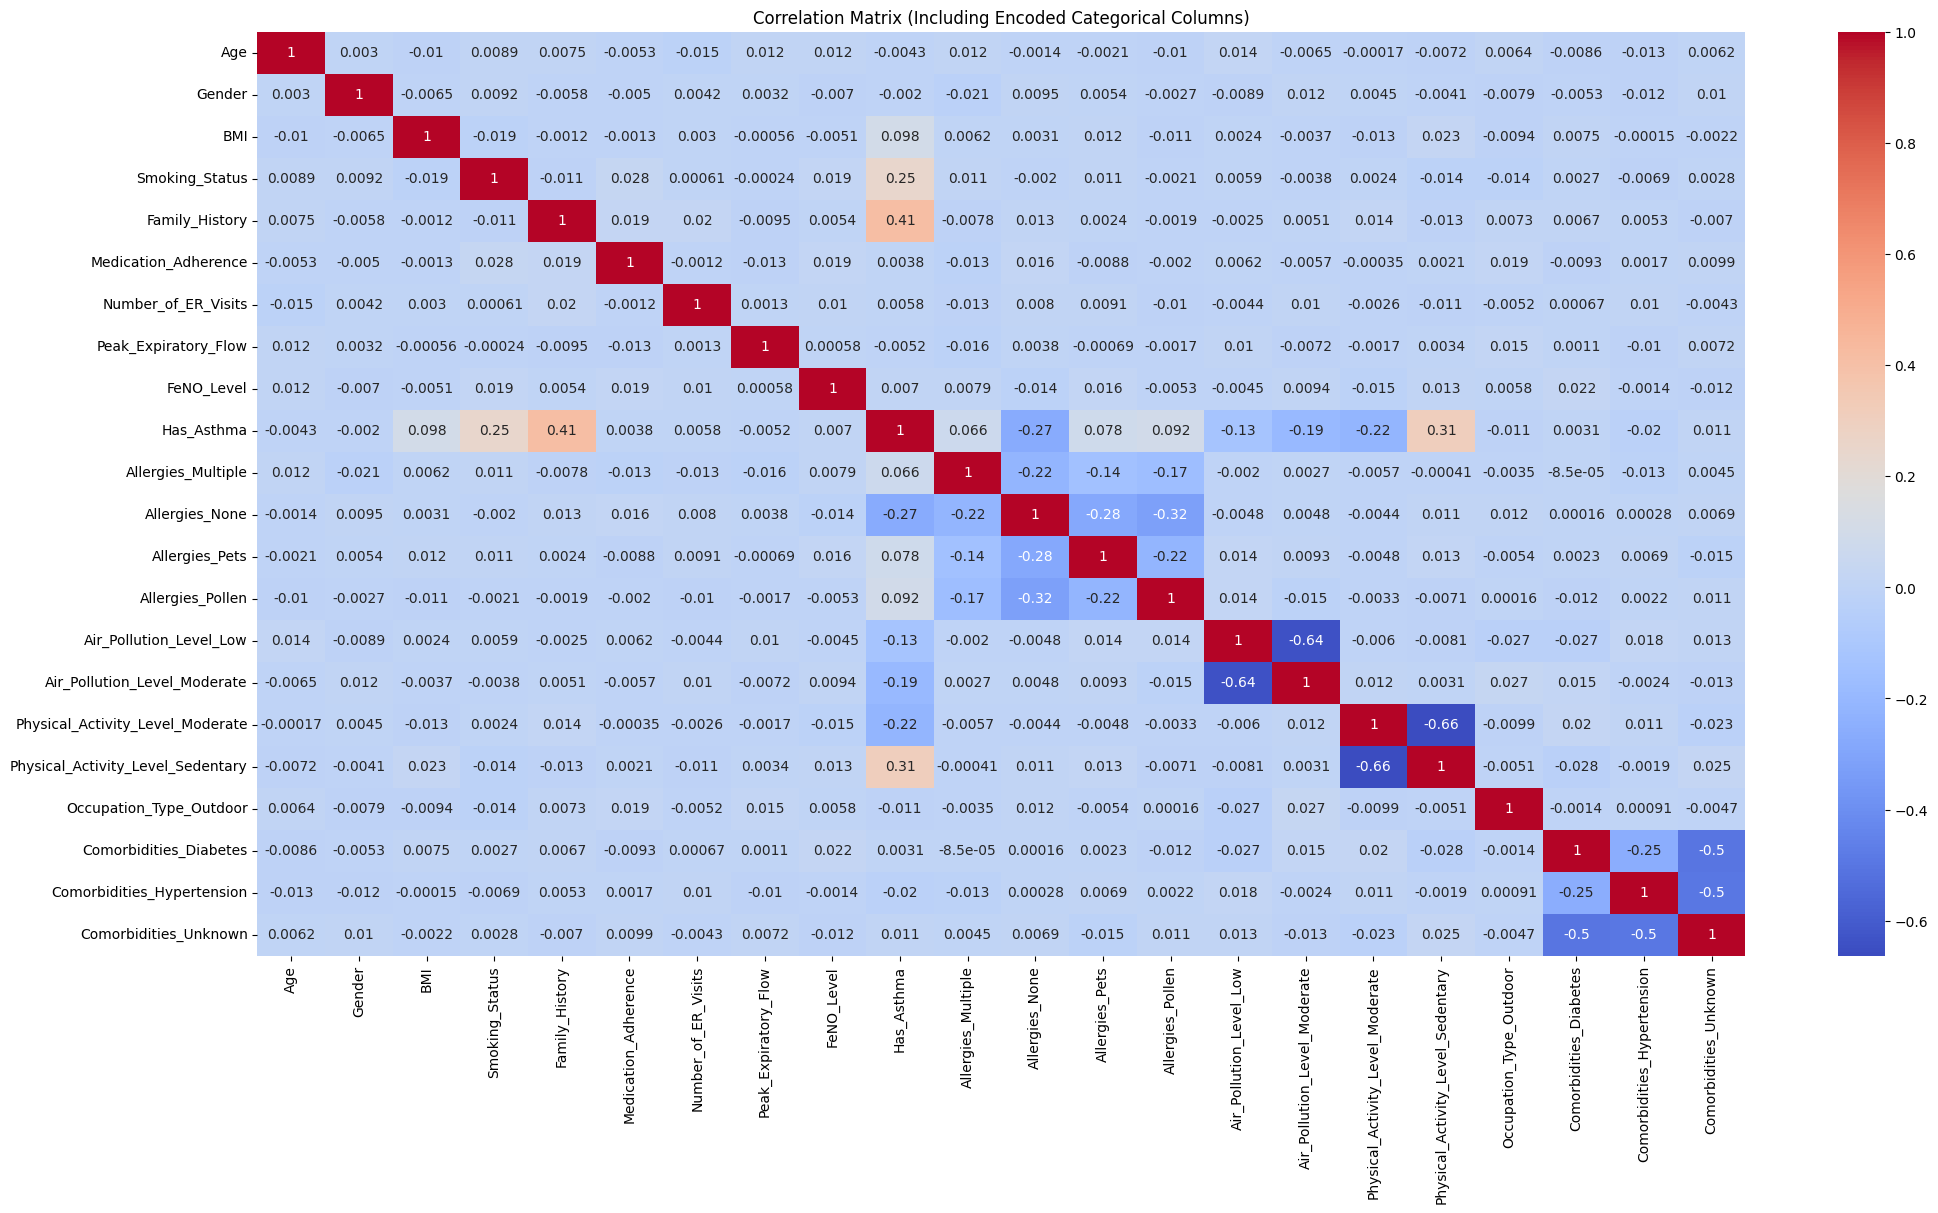

In [70]:
plt.figure(figsize=(24,12))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Including Encoded Categorical Columns)")
plt.show()


In [71]:
df_encoded

,Age,Gender,BMI,Smoking_Status,Family_History,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,...,Allergies_Pets,Allergies_Pollen,Air_Pollution_Level_Low,Air_Pollution_Level_Moderate,Physical_Activity_Level_Moderate,Physical_Activity_Level_Sedentary,Occupation_Type_Outdoor,Comorbidities_Diabetes,Comorbidities_Hypertension,Comorbidities_Unknown
0,0.275582,1,0.522479,1,1,-0.524908,-0.995480,0.206262,2.123906,0,...,0,0,0,1,0,1,1,1,0,0
1,-1.166785,0,-0.093004,1,0,0.453751,0.964319,-1.059039,-0.223729,0,...,0,0,1,0,1,0,0,0,0,0
2,1.055240,1,-1.529130,0,0,-0.524908,-0.995480,-1.000593,-0.996110,0,...,0,0,0,1,1,0,0,0,0,1
3,0.626428,0,-1.693259,0,0,0.453751,-0.015580,0.380574,1.524294,1,...,0,0,0,0,0,1,1,0,0,0
4,-0.932888,0,1.055898,0,0,1.432410,1.944218,1.375178,0.264092,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.977274,0,-0.010939,0,0,0.765143,-0.995480,1.842744,-0.650571,0,...,0,0,1,0,0,1,0,0,0,1
9996,1.289137,1,-0.051971,0,0,0.987565,-0.015580,0.171399,1.595434,0,...,0,1,1,0,1,0,0,1,0,0
9997,0.509479,0,1.035382,1,1,-0.969754,-0.995480,0.596926,-0.487964,1,...,0,1,1,0,1,0,0,0,0,1
9998,1.678966,1,1.261059,1,0,-0.258001,-0.995480,0.153968,-0.010307,0,...,0,1,0,1,1,0,0,0,0,1


In [72]:
# Top correlated features with target (assuming target column is 'Asthma')
cor_matrix = df_encoded.corr()
target_corr = cor_matrix['Has_Asthma'].abs().sort_values(ascending=False)

# Display top 10
print(target_corr.head(10))


Has_Asthma                           1.000000
Family_History                       0.409531
Physical_Activity_Level_Sedentary    0.311166
Allergies_None                       0.270376
Smoking_Status                       0.246034
Physical_Activity_Level_Moderate     0.216872
Air_Pollution_Level_Moderate         0.189654
Air_Pollution_Level_Low              0.128362
BMI                                  0.098425
Allergies_Pollen                     0.091868
Name: Has_Asthma, dtype: float64


In [73]:
# Example: remove features with correlation < 0.1 with the target
low_corr_features = target_corr[target_corr < 0.1].index
df_selected = df_encoded.drop(columns=low_corr_features)


In [74]:
df_selected

,Smoking_Status,Family_History,Has_Asthma,Allergies_None,Air_Pollution_Level_Low,Air_Pollution_Level_Moderate,Physical_Activity_Level_Moderate,Physical_Activity_Level_Sedentary
0,1,1,0,1,0,1,0,1
1,1,0,0,0,1,0,1,0
2,0,0,0,1,0,1,1,0
3,0,0,1,0,0,0,0,1
4,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
9995,0,0,0,1,1,0,0,1
9996,0,0,0,0,1,0,1,0
9997,1,1,1,0,1,0,1,0
9998,1,0,0,0,0,1,1,0


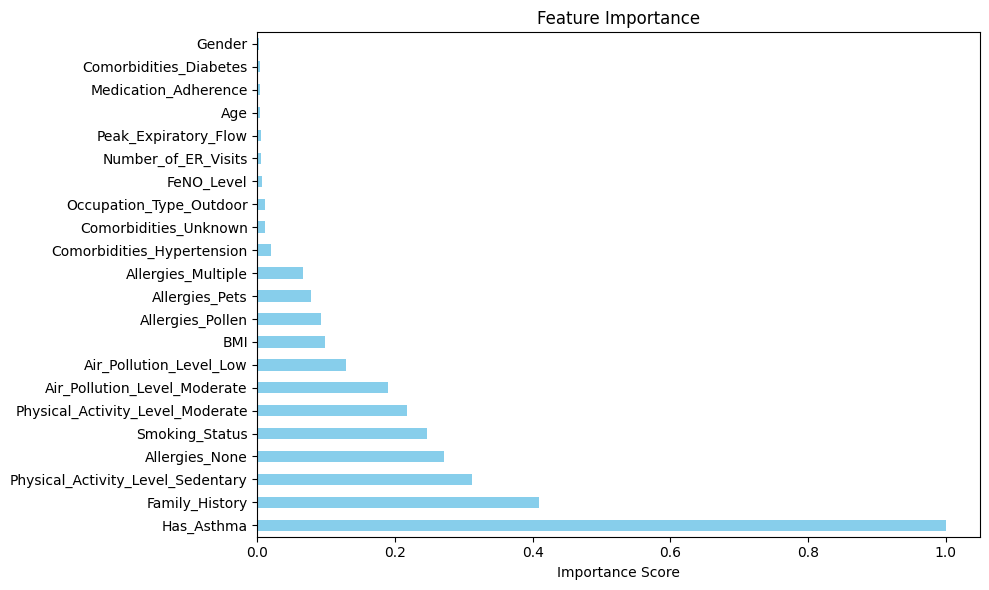

In [76]:
# The `target_corr` Series already contains the sorted correlation values.
target_corr.plot(kind='barh', figsize=(10,6), color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = df_selected.drop('Has_Asthma', axis=1)
y = df_selected['Has_Asthma']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = LogisticRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, preds))
print(classification_report(y_test, preds))


Accuracy: 0.966
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1513
           1       0.97      0.89      0.93       487

    accuracy                           0.97      2000
   macro avg       0.97      0.94      0.95      2000
weighted avg       0.97      0.97      0.97      2000



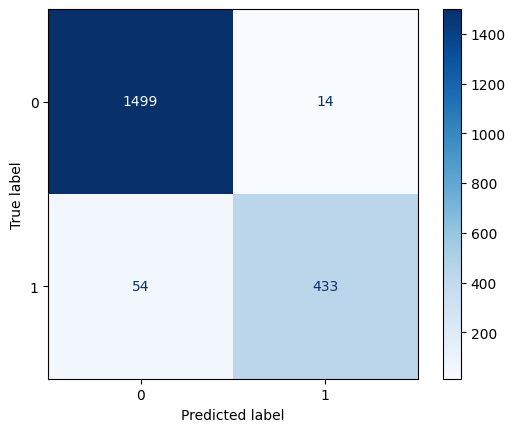

In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')


In [80]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation accuracy:", scores.mean())


Cross-validation accuracy: 0.9634


In [81]:
import joblib
joblib.dump(model, "asthma_model.pkl")


['asthma_model.pkl']